In [ ]:
pwd

'/kaggle/working'

In [15]:
!cp -r /kaggle/input/yolov8/mydataset /kaggle/working/
!cp -r /kaggle/input/yolov8/mydata.yaml /kaggle/working/mydata.yaml

In [16]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.3/8062.4 GB disk)


In [17]:
import os
import random
import shutil
from math import floor

# 定义数据集的路径
dataset_path = '/kaggle/working/mydataset'
images_path = os.path.join(dataset_path, 'images')
labels_path = os.path.join(dataset_path, 'labels')

# 创建训练、验证和测试集的目录结构
train_images_path = os.path.join(images_path, 'train')
val_images_path = os.path.join(images_path, 'val')
test_images_path = os.path.join(images_path, 'test')

train_labels_path = os.path.join(labels_path, 'train')
val_labels_path = os.path.join(labels_path, 'val')
test_labels_path = os.path.join(labels_path, 'test')

os.makedirs(train_images_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(test_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)
os.makedirs(test_labels_path, exist_ok=True)

# 获取所有图片文件名
image_files = [f for f in os.listdir(images_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# 打乱文件顺序
random.shuffle(image_files)

# 计算每个子集的大小
total_images = len(image_files)
train_size = floor(total_images * 0.7)
val_size = floor(total_images * 0.1)
test_size = total_images - train_size - val_size

# 划分数据集
train_files = image_files[:train_size]
val_files = image_files[train_size:train_size + val_size]
test_files = image_files[train_size + val_size:]

def copy_files(file_list, source_dir, dest_dir):
    for file_name in file_list:
        base_name = os.path.splitext(file_name)[0]
        image_source = os.path.join(source_dir, file_name)
        label_source = os.path.join(labels_path, f"{base_name}.txt")

        image_dest = os.path.join(dest_dir, file_name)
        label_dest = os.path.join(dest_dir.replace('images', 'labels'), f"{base_name}.txt")

        shutil.copy2(image_source, image_dest)
        shutil.copy2(label_source, label_dest)

# 复制训练集文件
copy_files(train_files, images_path, train_images_path)

# 复制验证集文件
copy_files(val_files, images_path, val_images_path)

# 复制测试集文件
copy_files(test_files, images_path, test_images_path)

print("数据集划分完成：")
print(f"训练集: {len(train_files)} 个文件")
print(f"验证集: {len(val_files)} 个文件")
print(f"测试集: {len(test_files)} 个文件")


数据集划分完成：
训练集: 40 个文件
验证集: 5 个文件
测试集: 13 个文件


In [18]:
from ultralytics import YOLO

# 加载预训练模型
model = YOLO('yolov8m.pt')

# 配置数据集路径和参数
data_config = '/kaggle/working/mydata.yaml'
epochs = 200
batch_size = 32

# 开始训练
model.train(data=data_config, epochs=epochs, batch=batch_size, imgsz=640)

100%|██████████| 49.7M/49.7M [00:00<00:00, 189MB/s] 


Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/mydata.yaml, epochs=200, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]
2024-06-07 04:20:41,795	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-07 04:20:43,223	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 76.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/mydataset/labels/train... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 823.79it/s]

train: New cache created: /kaggle/working/mydataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/mydataset/labels/val... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 575.02it/s]

val: New cache created: /kaggle/working/mydataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      13.3G      4.585      5.004      2.934        362        640: 100%|██████████| 2/2 [00:06<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]

                   all          5         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200        13G      4.519      5.003      3.104        211        640: 100%|██████████| 2/2 [00:04<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.95it/s]

                   all          5         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      13.2G      4.495      4.946      2.925        277        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.22it/s]

                   all          5         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      13.5G      4.504      4.942      3.032        219        640: 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.24it/s]

                   all          5         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200        13G      4.675      4.992      2.924        340        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.02it/s]

                   all          5         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      13.1G      4.202      4.656      2.766        281        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.02it/s]

                   all          5         92     0.0127     0.0164    0.00938   0.000986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      13.7G      3.554      4.037      2.294        186        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.45it/s]

                   all          5         92     0.0133      0.116     0.0113    0.00274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      13.2G      2.899      3.387       1.87        262        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.93it/s]

                   all          5         92     0.0576      0.464     0.0643     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      13.2G      2.468      2.929      1.543        291        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all          5         92      0.051      0.629      0.124     0.0372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      13.2G      2.376      2.707       1.37        343        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.78it/s]

                   all          5         92       0.23       0.39      0.155     0.0527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      12.7G      2.132      2.435      1.264        270        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.58it/s]

                   all          5         92      0.248      0.443       0.18     0.0695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      13.9G      2.003      2.249      1.231        312        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.15it/s]

                   all          5         92      0.341       0.49       0.22      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      13.2G       1.99      2.152      1.236        233        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.85it/s]

                   all          5         92      0.227      0.467      0.279       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      13.7G      1.949      2.015      1.189        308        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.51it/s]

                   all          5         92      0.326      0.507      0.327      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      13.6G      1.887      1.917      1.266        202        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.98it/s]

                   all          5         92      0.521      0.442      0.393      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      12.8G      1.884      1.916      1.179        279        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.76it/s]

                   all          5         92      0.302      0.594      0.376      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      13.6G      1.845       1.88      1.171        244        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.56it/s]

                   all          5         92       0.45      0.479       0.43      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      13.2G      1.843      1.875      1.185        236        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.48it/s]

                   all          5         92      0.282      0.768      0.573      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      12.8G      1.816      1.746      1.134        292        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.98it/s]

                   all          5         92      0.425      0.679      0.582      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      13.7G      1.813      1.593      1.122        325        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.44it/s]

                   all          5         92      0.408      0.749      0.606      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      12.7G      1.802      1.649      1.099        314        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.19it/s]

                   all          5         92      0.379       0.74      0.605      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      13.7G      1.794      1.513       1.24        319        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.57it/s]

                   all          5         92      0.283      0.594      0.457      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      12.5G      1.775      1.521      1.171        225        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.27it/s]

                   all          5         92      0.413      0.468       0.47      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      13.6G      1.878      1.536      1.206        243        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.93it/s]

                   all          5         92      0.555      0.675      0.616      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      13.7G      1.791       1.37      1.157        314        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.46it/s]

                   all          5         92      0.596      0.741      0.707      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      13.1G      1.854      1.679      1.144        281        640: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.83it/s]

                   all          5         92      0.498      0.803      0.761       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      13.3G      1.794      1.393      1.186        331        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.47it/s]

                   all          5         92       0.53      0.757      0.771      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      13.7G      1.813       1.41      1.166        344        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.64it/s]

                   all          5         92      0.545      0.741       0.78      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      13.6G      1.764       1.46       1.15        272        640: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.81it/s]

                   all          5         92      0.695      0.717      0.809      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      12.8G      1.702      1.465      1.087        312        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.36it/s]

                   all          5         92      0.697      0.719       0.82      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      12.7G      1.749      1.381      1.122        360        640: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.71it/s]

                   all          5         92      0.685      0.749       0.82      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      13.7G       1.65      1.245      1.124        325        640: 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.83it/s]

                   all          5         92      0.661       0.78      0.815      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      13.1G      1.691      1.325      1.127        245        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.20it/s]

                   all          5         92      0.648      0.746      0.832      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      13.6G      1.666      1.348      1.131        242        640: 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.94it/s]

                   all          5         92      0.618      0.889      0.857      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      13.1G       1.62      1.172      1.148        247        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.27it/s]

                   all          5         92      0.651        0.8      0.829      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      13.7G      1.613       1.29      1.073        335        640: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.70it/s]

                   all          5         92      0.706      0.794      0.804      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      13.2G      1.642      1.308      1.031        405        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.63it/s]

                   all          5         92      0.637      0.763      0.837      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      13.2G      1.661      1.131      1.185        234        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.78it/s]

                   all          5         92       0.68      0.747      0.834      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      13.2G      1.667      1.217      1.124        224        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.86it/s]

                   all          5         92      0.619      0.809      0.857      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      13.6G      1.875      1.314       1.19        295        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.02it/s]

                   all          5         92      0.739      0.772      0.924      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200        14G      1.653       1.27      1.067        322        640: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.56it/s]

                   all          5         92      0.678      0.857      0.912      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      13.7G      1.693       1.23      1.061        338        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.20it/s]

                   all          5         92      0.757      0.915      0.923      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      13.1G      1.647      1.212      1.111        241        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.91it/s]

                   all          5         92      0.776      0.865      0.926       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      13.2G      1.723        1.1      1.129        301        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.57it/s]

                   all          5         92      0.641      0.837      0.867      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      12.7G      1.607      1.124        1.1        304        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.77it/s]

                   all          5         92       0.79      0.807      0.895      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      13.7G      1.672      1.088      1.084        247        640: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.30it/s]

                   all          5         92      0.871      0.696      0.897      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      13.2G      1.647      1.118      1.129        226        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.26it/s]

                   all          5         92      0.767      0.844       0.89      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      12.7G      1.677      1.031      1.119        300        640: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.01it/s]

                   all          5         92      0.736      0.884      0.923      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      13.7G       1.61      1.106      1.099        255        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.32it/s]

                   all          5         92      0.777      0.884      0.919      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      13.3G      1.684       1.03      1.151        288        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.11it/s]

                   all          5         92      0.726      0.865      0.885      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      13.7G      1.554      1.031       1.09        283        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.89it/s]

                   all          5         92      0.701      0.723      0.782       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      13.3G      1.555     0.9707      1.088        243        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.37it/s]

                   all          5         92      0.789      0.813      0.903      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      13.6G      1.593      1.035      1.098        242        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.10it/s]

                   all          5         92      0.851      0.844       0.94      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      12.9G      1.637      1.033      1.118        231        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.59it/s]

                   all          5         92      0.751      0.893      0.927      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      13.6G      1.518       1.03      1.021        298        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.82it/s]

                   all          5         92      0.777      0.881      0.929      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      12.7G      1.567      1.008      1.093        247        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.68it/s]

                   all          5         92      0.843      0.824      0.927      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      13.7G       1.52      1.034       1.05        338        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.71it/s]

                   all          5         92      0.822      0.844      0.922      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      13.7G      1.593      1.098      1.035        323        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.73it/s]

                   all          5         92      0.789      0.859      0.915      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      13.7G      1.515     0.9999      1.077        281        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.14it/s]

                   all          5         92      0.821      0.891       0.93      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      13.4G      1.501     0.9212      1.093        229        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.82it/s]

                   all          5         92      0.865      0.891      0.934      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      13.7G      1.429     0.9329      1.047        260        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.42it/s]

                   all          5         92      0.846      0.872      0.945      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      13.1G      1.381      0.864      1.021        256        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.26it/s]

                   all          5         92      0.752      0.911      0.947      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      13.2G      1.394     0.8738      1.023        231        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.64it/s]

                   all          5         92      0.769      0.938      0.947      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      13.2G      1.409     0.8589      1.026        274        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.72it/s]

                   all          5         92      0.813      0.924      0.948      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      13.4G      1.393     0.8531      1.003        318        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.84it/s]

                   all          5         92      0.824      0.921      0.951      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      13.2G      1.341     0.8256      1.045        240        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.77it/s]

                   all          5         92      0.852      0.914      0.951      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      13.4G       1.45     0.8854      1.053        261        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.63it/s]

                   all          5         92      0.876      0.881      0.951      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      13.2G      1.425     0.8948      1.074        279        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.96it/s]

                   all          5         92      0.894      0.865      0.941      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      13.2G      1.363     0.8449      1.009        331        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.46it/s]

                   all          5         92      0.876      0.848      0.943      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      13.2G      1.476     0.8576      1.022        301        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.02it/s]

                   all          5         92      0.858      0.868      0.946      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      12.8G      1.445     0.8831      1.045        339        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.51it/s]

                   all          5         92      0.824      0.863      0.935      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      13.7G      1.377     0.8467      1.041        266        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.61it/s]

                   all          5         92      0.912      0.882      0.963      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      13.2G      1.399     0.9047      1.039        195        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.62it/s]

                   all          5         92      0.892      0.915      0.957      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      13.2G      1.335     0.8471     0.9942        289        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.55it/s]

                   all          5         92      0.901      0.858       0.96      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      13.7G      1.412     0.8786      1.016        307        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.19it/s]

                   all          5         92      0.838       0.88      0.954       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      13.2G      1.421     0.8769      1.032        230        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.72it/s]

                   all          5         92      0.877      0.886      0.951      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      13.7G      1.353     0.7849     0.9985        292        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.30it/s]

                   all          5         92      0.879       0.91      0.953      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      13.7G      1.303      0.798     0.9945        360        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.36it/s]

                   all          5         92      0.909      0.886      0.959      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      12.9G      1.289     0.8159     0.9867        234        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.46it/s]

                   all          5         92      0.931      0.852      0.968      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      13.6G      1.392     0.7848      1.069        223        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.52it/s]

                   all          5         92      0.866      0.835      0.966       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      12.8G      1.466     0.9309      1.073        221        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.21it/s]

                   all          5         92      0.887      0.868      0.966      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      13.2G      1.273     0.7827      1.009        266        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.99it/s]

                   all          5         92       0.87      0.901      0.964      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      13.2G      1.291     0.7638      1.043        288        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.03it/s]

                   all          5         92      0.865      0.959      0.972      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      13.7G      1.342     0.7747     0.9948        325        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.01it/s]

                   all          5         92      0.854       0.94      0.968      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      12.7G      1.268     0.7568     0.9725        336        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.26it/s]

                   all          5         92      0.887      0.926      0.961      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      13.3G       1.41     0.9088      1.019        306        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.57it/s]

                   all          5         92      0.896      0.906      0.961      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      13.8G      1.237     0.7372     0.9949        316        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.17it/s]

                   all          5         92      0.854      0.916      0.951      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      13.2G      1.404     0.7918      0.983        318        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.00it/s]

                   all          5         92      0.892      0.867      0.962      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      12.7G      1.296     0.7367     0.9933        306        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.70it/s]

                   all          5         92      0.901      0.861      0.964      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      13.2G      1.327     0.7955      1.039        267        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.10it/s]

                   all          5         92      0.887       0.88      0.969      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      13.7G      1.291     0.7485     0.9807        351        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.72it/s]

                   all          5         92      0.896      0.874      0.967       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      12.8G      1.183     0.6995     0.9698        312        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.15it/s]

                   all          5         92      0.864      0.907      0.969      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      13.1G      1.181     0.6729     0.9862        290        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.00it/s]

                   all          5         92        0.9      0.891      0.972      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      13.7G      1.356     0.7706     0.9548        322        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.51it/s]

                   all          5         92      0.912      0.899      0.975      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      13.7G      1.249     0.7161     0.9527        322        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.88it/s]

                   all          5         92      0.902      0.918      0.971      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      13.1G      1.306     0.7307     0.9781        310        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.65it/s]

                   all          5         92      0.901      0.937      0.955      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      12.8G      1.344     0.7401     0.9973        341        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.73it/s]

                   all          5         92      0.865      0.943       0.97      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      13.2G       1.25     0.6923     0.9718        277        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.35it/s]

                   all          5         92      0.851      0.868      0.957      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      13.2G      1.194     0.7179     0.9527        219        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.95it/s]

                   all          5         92      0.857      0.865      0.958      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      13.3G      1.411     0.8497     0.9611        310        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.80it/s]

                   all          5         92      0.833      0.891      0.961      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      13.4G      1.156     0.6848     0.9602        280        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.00it/s]

                   all          5         92      0.874      0.907      0.977      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      13.1G      1.224     0.6741     0.9641        261        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.68it/s]

                   all          5         92      0.894      0.928      0.977      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      13.2G      1.179     0.7265     0.9506        347        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.71it/s]

                   all          5         92      0.903      0.895      0.961      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      13.1G      1.258      0.739     0.9603        309        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.03it/s]

                   all          5         92       0.86      0.912       0.95      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      13.7G      1.185     0.6703     0.9743        301        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.87it/s]

                   all          5         92      0.866      0.943      0.963      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      13.7G      1.208     0.6631     0.9697        268        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.25it/s]

                   all          5         92      0.859      0.946      0.948      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      13.2G      1.127     0.6478     0.9593        312        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.69it/s]

                   all          5         92      0.854      0.914      0.937      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      13.2G      1.049     0.6044     0.9747        196        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.20it/s]

                   all          5         92      0.842      0.941      0.945      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      13.7G      1.288     0.7001     0.9889        243        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.49it/s]

                   all          5         92      0.879      0.944       0.97      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      13.2G      1.124      0.657     0.9486        308        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.68it/s]

                   all          5         92      0.902      0.913      0.966      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      13.7G      1.133     0.6685     0.9365        294        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.09it/s]

                   all          5         92      0.927      0.902      0.971      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      13.7G      1.136     0.6685     0.9585        330        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.87it/s]

                   all          5         92      0.871      0.954       0.97      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      13.7G      1.127     0.6484      0.932        344        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.31it/s]

                   all          5         92      0.911      0.904      0.975      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      12.7G      1.102     0.6546     0.9097        307        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.46it/s]

                   all          5         92      0.864       0.94      0.967      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      13.3G      1.115      0.618     0.9491        268        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.17it/s]

                   all          5         92      0.898      0.911      0.968      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      13.1G      1.075     0.6262     0.9127        256        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.45it/s]

                   all          5         92      0.897      0.932      0.957      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      13.1G      1.061     0.6225      0.938        267        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.79it/s]

                   all          5         92      0.901      0.917      0.957      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      12.7G      1.109     0.6399     0.9278        273        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.65it/s]

                   all          5         92      0.911      0.927      0.962       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      13.6G      1.155     0.6508     0.9184        319        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.10it/s]

                   all          5         92      0.903      0.922      0.971      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      13.3G      1.061     0.6039     0.9144        263        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.19it/s]

                   all          5         92      0.895      0.942      0.974      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      13.2G      1.016     0.5804     0.9012        270        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.71it/s]

                   all          5         92      0.901      0.924      0.973      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      13.2G      1.022     0.5745     0.9464        253        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.31it/s]

                   all          5         92      0.894      0.929      0.973      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      12.8G       1.12       0.65     0.9166        247        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.42it/s]

                   all          5         92      0.918      0.881      0.968      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      13.2G      1.057     0.5963     0.9224        215        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.99it/s]

                   all          5         92      0.887      0.914      0.961      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      13.2G      1.099       0.63     0.8904        368        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.73it/s]

                   all          5         92       0.89      0.926      0.966      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      13.2G      1.135     0.6923     0.9184        328        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.29it/s]

                   all          5         92      0.896      0.947      0.973       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      13.2G      1.084     0.6183     0.9235        289        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.52it/s]

                   all          5         92      0.963      0.904      0.974       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      13.4G      1.145     0.6316     0.9287        241        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.16it/s]

                   all          5         92      0.927       0.94      0.972      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      13.6G     0.9731     0.5576     0.8902        329        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.31it/s]

                   all          5         92       0.93      0.926       0.97      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      12.7G      1.005     0.5809      0.929        235        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.41it/s]

                   all          5         92      0.918      0.904      0.965      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      13.2G      1.033     0.6088     0.9101        292        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.96it/s]

                   all          5         92      0.913      0.856      0.943      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      13.2G      1.018     0.5716     0.9087        211        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.90it/s]

                   all          5         92       0.87      0.896      0.948      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      13.1G      1.034     0.5862      0.904        316        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.47it/s]

                   all          5         92      0.891      0.875      0.946      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      13.2G      1.071     0.6185      0.924        294        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.72it/s]

                   all          5         92      0.901      0.893      0.949      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      13.7G     0.9614     0.5439     0.9086        288        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.02it/s]

                   all          5         92      0.905      0.904      0.948      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      12.7G     0.9684     0.5263     0.9102        247        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.69it/s]

                   all          5         92      0.911      0.915      0.956      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      13.1G       1.09     0.6122     0.9488        251        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.33it/s]

                   all          5         92      0.915      0.902      0.961      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      13.2G      1.008     0.5849     0.9034        282        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.35it/s]

                   all          5         92       0.89      0.879      0.954      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      13.7G      1.074     0.5947      0.918        284        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.26it/s]

                   all          5         92      0.881      0.903      0.954      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      13.2G      1.083     0.6109      0.946        223        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.91it/s]

                   all          5         92      0.888      0.911       0.97      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      13.7G     0.9889     0.5667      0.901        297        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.81it/s]

                   all          5         92      0.868      0.911      0.962      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      13.7G     0.9744     0.5637     0.8997        235        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.34it/s]

                   all          5         92      0.861      0.923      0.965      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      13.2G     0.9865     0.5762     0.9037        251        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.60it/s]

                   all          5         92      0.861      0.947       0.97      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      13.7G     0.9551     0.5794      0.919        261        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.76it/s]

                   all          5         92      0.881      0.935      0.969      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      13.7G     0.9289     0.5413     0.9034        315        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.55it/s]

                   all          5         92      0.937      0.919      0.975       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      13.7G      0.917     0.5404     0.8974        371        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.50it/s]

                   all          5         92      0.946      0.918      0.977      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      13.6G     0.9126     0.5029     0.8975        228        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.70it/s]

                   all          5         92       0.94      0.925      0.978      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      12.7G     0.9292      0.551     0.9227        233        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.07it/s]

                   all          5         92      0.939      0.943      0.979      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      13.2G      1.024     0.5534     0.8686        351        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.96it/s]

                   all          5         92      0.937      0.944      0.979      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      13.3G     0.9293      0.545     0.8785        370        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.89it/s]

                   all          5         92      0.932      0.951      0.978      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      13.7G     0.9138     0.5177      0.883        281        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.74it/s]

                   all          5         92      0.945      0.911      0.973      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      13.8G     0.9004     0.5234     0.8961        243        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.28it/s]

                   all          5         92      0.947      0.921      0.972      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      13.7G      0.964      0.544     0.9022        218        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.75it/s]

                   all          5         92      0.947      0.927      0.972      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      13.7G     0.9742      0.534     0.8923        277        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.01it/s]

                   all          5         92      0.941       0.93      0.975      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      13.6G     0.8453     0.5004     0.8686        274        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.35it/s]

                   all          5         92      0.938      0.932      0.974      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      13.7G     0.9211     0.5339     0.8866        300        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.23it/s]

                   all          5         92      0.933      0.932      0.979      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      12.7G     0.8648     0.5037     0.8877        327        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.13it/s]

                   all          5         92      0.929      0.931       0.98       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      13.2G     0.8718     0.5117     0.8798        252        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.05it/s]

                   all          5         92      0.926      0.946      0.977      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      13.7G     0.8716     0.5061      0.929        220        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.02it/s]

                   all          5         92      0.934      0.931      0.975      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      13.4G     0.9674     0.5487     0.8793        315        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.20it/s]

                   all          5         92      0.904      0.943      0.972      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      13.2G     0.9972     0.6127     0.9187        289        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.92it/s]

                   all          5         92      0.881      0.921      0.954      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      13.2G     0.8861     0.5211     0.8851        271        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.15it/s]

                   all          5         92      0.874      0.915      0.952      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      13.7G     0.8776     0.5103     0.8865        299        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.10it/s]

                   all          5         92      0.862      0.933      0.954      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      12.7G     0.8404     0.5098     0.8679        315        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.76it/s]

                   all          5         92      0.905      0.905      0.957      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      13.7G     0.8987     0.5389     0.8675        356        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.13it/s]

                   all          5         92      0.935      0.935      0.975      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      13.2G     0.9883     0.5555     0.8906        265        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.90it/s]

                   all          5         92      0.932      0.945      0.975      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      13.3G     0.8445     0.5068      0.871        288        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.39it/s]

                   all          5         92      0.925      0.951      0.975      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      13.1G     0.8541     0.5132     0.8802        310        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.99it/s]

                   all          5         92      0.917      0.954      0.974      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      13.2G      0.769     0.4691     0.8785        289        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.85it/s]

                   all          5         92      0.914       0.95      0.974      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      13.7G     0.8481     0.4995     0.8997        246        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.54it/s]

                   all          5         92      0.912      0.949      0.974      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      13.3G     0.9195     0.5232     0.8739        331        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.01it/s]

                   all          5         92      0.931      0.916      0.973      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      12.8G     0.8516     0.4934     0.8777        198        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.31it/s]

                   all          5         92      0.933      0.913      0.974      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      13.1G       0.95     0.5909     0.8742        420        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.25it/s]

                   all          5         92      0.932      0.917      0.974      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      13.7G     0.8195     0.4875     0.8648        323        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.19it/s]

                   all          5         92      0.929      0.926      0.974      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      13.7G     0.7737     0.4718     0.8543        341        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.17it/s]

                   all          5         92      0.925      0.943      0.974        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      13.7G     0.8784     0.5158      0.879        227        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.03it/s]

                   all          5         92      0.926      0.942      0.974      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      13.1G      0.802     0.4738     0.8753        219        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.84it/s]

                   all          5         92      0.902      0.959      0.972      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      13.6G     0.8532     0.4835     0.8581        264        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.42it/s]

                   all          5         92        0.9      0.957      0.969      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      13.2G     0.8934     0.4908     0.8827        263        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.76it/s]

                   all          5         92      0.902      0.952      0.972      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      13.6G     0.8385     0.4827     0.8906        159        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.13it/s]

                   all          5         92      0.899      0.956      0.972        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      13.2G     0.9317     0.5407     0.8817        252        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.46it/s]

                   all          5         92      0.938       0.92      0.973        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      13.3G      0.784     0.4556     0.8587        183        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.13it/s]

                   all          5         92      0.938      0.914      0.973      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      13.1G     0.7699     0.4691     0.8677        250        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.42it/s]

                   all          5         92      0.937       0.91      0.973      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      13.2G     0.8388     0.5009     0.8878        308        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.84it/s]

                   all          5         92       0.94      0.905      0.973      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      13.7G     0.8123     0.4874     0.8708        338        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.07it/s]

                   all          5         92      0.933      0.903      0.973      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      13.2G     0.8271     0.4987     0.8828        254        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.13it/s]

                   all          5         92      0.893      0.944      0.973      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      13.2G     0.7764      0.468     0.8513        354        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.00it/s]

                   all          5         92      0.896      0.937      0.973      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      13.1G     0.7775     0.4504      0.871        283        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.81it/s]

                   all          5         92      0.882      0.952      0.972      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      13.7G     0.7654     0.4564     0.8644        305        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.91it/s]

                   all          5         92      0.899      0.941      0.974      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      13.7G     0.8317     0.5112      0.875        211        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.65it/s]

                   all          5         92      0.898      0.948      0.974      0.597


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200        14G     0.8508     0.5092      0.879        139        640: 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all          5         92        0.9      0.947      0.968      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200        14G     0.9601       0.58     0.8864        120        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.49it/s]

                   all          5         92      0.904      0.942      0.968      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      14.1G     0.8856      0.511     0.8591        128        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.43it/s]

                   all          5         92      0.903      0.942      0.965      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      14.4G     0.7831     0.4709     0.8679        142        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.67it/s]

                   all          5         92        0.9      0.943      0.965      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      13.5G      0.723     0.4681     0.8621        141        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.16it/s]

                   all          5         92      0.897      0.945      0.965       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      13.5G     0.7802     0.4716     0.8443        157        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.96it/s]

                   all          5         92      0.897      0.948      0.965       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200        14G     0.8275      0.485     0.8871        125        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.94it/s]

                   all          5         92      0.896      0.951      0.965      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200        14G     0.8267     0.5025     0.8687        156        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.67it/s]

                   all          5         92      0.898       0.95      0.961      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200        14G     0.7253     0.4288     0.8448        116        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.94it/s]

                   all          5         92        0.9       0.95      0.961      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      13.9G     0.7916     0.4715     0.8817        116        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.81it/s]

                   all          5         92      0.901      0.949      0.961      0.573



200 epochs completed in 0.178 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.84it/s]


                   all          5         92      0.902      0.913      0.966      0.609
                    c1          3         10       0.93        0.8      0.892      0.504
                    d1          4          7          1      0.745      0.995      0.601
                    e1          3          7          1      0.932      0.995      0.613
                    f1          2          3      0.947      0.667      0.913      0.684
                    g1          2          8      0.924          1      0.995       0.42
                    a1          2          6      0.744      0.972      0.816      0.498
                    b1          1          1      0.713          1      0.995      0.597
                    c2          4         16      0.929      0.819      0.973      0.641
                    d2          2          6      0.889          1      0.995       0.64
                    e2          3          8          1      0.853      0.982       0.59
                    f

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x77fe5c967a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

In [19]:
# 验证模型
metrics = model.val(data=data_config)

# 使用测试集进行预测
results = model.predict(source='/kaggle/working/mydataset/images/test', save=True)


Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/working/mydataset/labels/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


                   all          5         92      0.902      0.913      0.966      0.595
                    c1          3         10       0.93        0.8      0.892      0.495
                    d1          4          7          1      0.747      0.995      0.563
                    e1          3          7          1      0.931      0.995      0.596
                    f1          2          3      0.948      0.667      0.913      0.667
                    g1          2          8      0.924          1      0.995      0.415
                    a1          2          6      0.744      0.972      0.816      0.517
                    b1          1          1      0.713          1      0.995      0.497
                    c2          4         16      0.929      0.818      0.973       0.64
                    d2          2          6      0.889          1      0.995       0.64
                    e2          3          8          1      0.853      0.982      0.593
                    f

/kaggle/working/mydataset/images/test/16_11.jpg


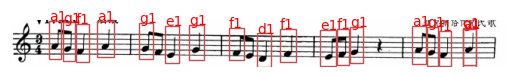

/kaggle/working/mydataset/images/test/17_11.jpg


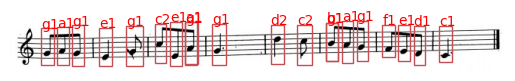

/kaggle/working/mydataset/images/test/17_2.jpg


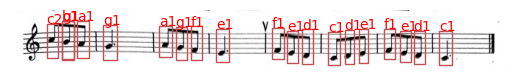

/kaggle/working/mydataset/images/test/18_6.jpg


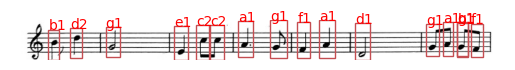

/kaggle/working/mydataset/images/test/19_3.jpg


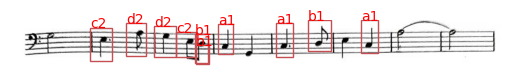

/kaggle/working/mydataset/images/test/19_4.jpg


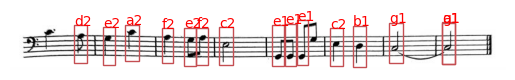

/kaggle/working/mydataset/images/test/19_5.jpg


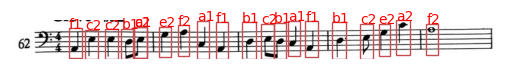

/kaggle/working/mydataset/images/test/19_6.jpg


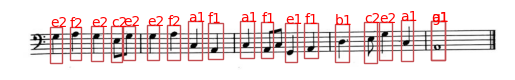

/kaggle/working/mydataset/images/test/32_10.png


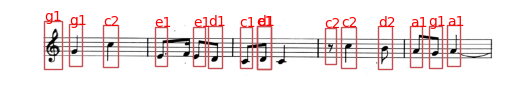

/kaggle/working/mydataset/images/test/32_11.png


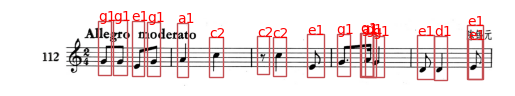

/kaggle/working/mydataset/images/test/32_8.png


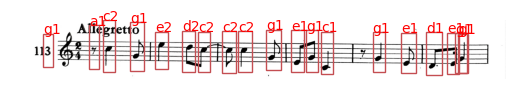

/kaggle/working/mydataset/images/test/32_9.png


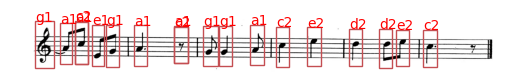

/kaggle/working/mydataset/images/test/llj3.jpg


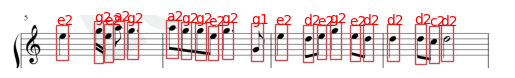

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


detection_info = []

for result in results:
    img_info = {
        "path": result.path,
        "boxes": [],
        "names": []
    }
    # 提取检测框和类别信息
    for box in result.boxes:

        box_info = {
            "coordinates_xy": box.xyxy.tolist(),
            "coordinates_wh": box.xywh.tolist(),
            "confidence": box.conf.tolist(),
            "class": result.names[int(box.cls.item())]
        }
        img_info["boxes"].append(box_info)
        img_info["names"].append(result.names[(box.cls.item())])

    detection_info.append(img_info)


for dete in detection_info:
  # 读取图像
  image = plt.imread(dete['path'])
  print(dete['path'])

  # 创建绘图对象
  fig, ax = plt.subplots()

  # 显示图像
  ax.imshow(image)

  # 为每个框绘制矩形
  for box in dete['boxes']:
      x, y, w, h = box['coordinates_xy'][0][0], box['coordinates_xy'][0][1], box['coordinates_wh'][0][2], box['coordinates_wh'][0][3]
      value = box['class']
      rect = plt.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
      ax.add_patch(rect)
      plt.annotate(value, (x, y), color='red')

  # 关闭坐标轴
  plt.axis('off')

  # 显示绘图
  plt.show()